\centerline{\textbf{ Niels Clayton - 300437590}}

# Question 1

## Introduction

The purpose of question one is to look at different methods of numerical differentiation and their respective errors.

## Procedure

All three methods of numerical differentiation (central difference, forward difference, backward difference) were 
implemented in python. Then the functions were tested for the differentiation of $sin(x)$ into $cos(x)$. The 
the deference between the expected and the actual output was taken as the error. This error was then computed 
for a range of different step sizes and compared.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implementation of the numerical differentiation functions:

In [2]:
def der_central(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)


def der_forwards(f, x, h):
    return (f(x + h) - f(x)) / h


def der_backwards(f, x, h):
    return (f(x) - f(x-h)) / h

Comparison of the errors of the functions for different step sizes:

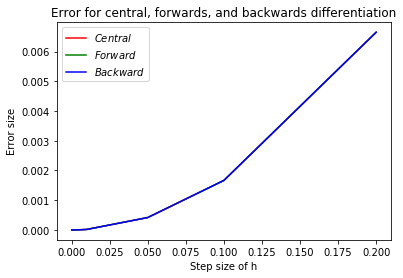

In [3]:
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)
x = np.pi
h_step = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
central_error = []
backward_error = []
forward_error = []

for h in h_step:
    central_error.append(np.abs(df(x) - der_central(f, x, h)))
    backward_error.append(np.abs(df(x) - der_backwards(f, x, h)))
    forward_error.append(np.abs(df(x) - der_forwards(f, x, h)))


plt.plot(h_step, central_error, 'r', label='$Central$')
plt.plot(h_step, forward_error, 'g', label='$Forward$')
plt.plot(h_step, backward_error, 'b', label='$Backward$')
plt.legend()
plt.title("Error for central, forwards, and backwards differentiation")
plt.xlabel("Step size of h")
plt.ylabel("Error size")
plt.show()

Calculate the order of accuracy of each of the numerical differentiation functions:

In [4]:
def p(E, h):
    powers = []
    for i in range(0, len(h_step)-1):
        powers.append(np.log(E[i]/E[i+1])/np.log(h[i]/h[i+1]))
    return powers

print(np.average(p(central_error, h_step)))
print(np.average(p(backward_error, h_step)))
print(np.average(p(forward_error, h_step)))


1.9997154752429829
1.999715481163221
1.9997154758612827


## Observations & discussion

It can be observed that for the case of $sin(x)$ and its derivative,there is almost no difference between the three 
different functions of numerical differentiation. It can also be observed that all the functions have an order of accuracy 
close to 2, making them quadratic. This means that as the size of h increases, that error will increase in a quadratic 
fashion. It can also be seen on the graph, that as the step size used for computation (h) decreases in size, the error 
also decreases in size.


## Conclusions

It can be concluded that $sin(x)$ is not a very good test function for these methods, as it does not show any significant 
differences between them. A possible test function that would show the differences in error would be $e^x$, as this 
function grows exponentially, meaning that the small changes from $x$ to $x-h$ could lead to very large changes in $y$. 
This would then show that the central difference function provides the dest estimate of the derivative at a point, and
that the forward and reverse difference functions are better suited to functions with only small gradients in the 
direction of stepping.

# Question 2


## Introduction

The purpose of question two is to look at different methods of numerical quadrature and their error, specifically the 
midpoint rule, the trapezium rule, and the Gauss-Legendre Quadrature rule.

## Procedure

All three methods of numerical quadrature were implemented in python. Then the functions were tested for the quadrature 
of $\frac{1}{1+x^2}$, which should evaluate to exactly $2 \times arctan(5)$. The the deference between the expected and 
the actual output was taken as the error. This error was then computed for a range of different interval sizes and compared.

Then the methods were tested on their degree of exactness, this was done by testing across a range of functions with a 
set number of intervals. The degree of exactness of a method is considered to be the last order of function that when 
integrated, the error will be equal to 0.


Implementation of the numerical quadrature functions:

In [5]:
def midpointquad(func, a, b, N):
    x = np.linspace(a, b, N)
    total = 0
    for k in range(0, len(x)-1):
        total += ((x[k+1]-x[k])*func((x[k]+x[k+1])/2))
    return total


def trapezoid(func, a, b, N):
    x = np.linspace(a, b, N)
    total = 0
    h = np.abs(b-a)/(N-1)

    for k in range(0, len(x)-1):
        x1 = func(x[k])
        x2 = func(x[k+1])

        total += ((x1 + x2)/2) * h
    return total


def GaussQuadrature(func, a, b, N):
    x, w = np.polynomial.legendre.leggauss(N)
    total = 0

    for n in range(N):
        total += (w[n] * func( (((b-a)/2) * x[n]) + ((a+b)/2) ) )

    return total*((b-a)/2)


Testing of the midpoint quadrature method:

In [6]:
f = lambda x:1/(1+x**2)
int_f = 2*np.arctan(5)

print("{:5s} {:5s} {:17s} {:15s}".format("N","h", "Midpoint", "Error"))
for n in (11, 101, 1001, 10001):
    mid = midpointquad(f, -5, 5, n)
    print("{:5d} {:.3f} {:.15f} {:.2E}".format(n, (10 / (n - 1)), mid, np.abs(int_f-mid)))


N     h     Midpoint          Error          
   11 1.000 2.736307727635371 1.05E-02
  101 0.100 2.746813859774802 1.23E-05
 1001 0.010 2.746801657164037 1.23E-07
10001 0.001 2.746801535122770 1.23E-09


In [7]:
func1 = midpointquad(lambda x: 1     , 0, 1, 2)
func2 = midpointquad(lambda x: 2*x   , 0, 1, 2)
func3 = midpointquad(lambda x: 3*x**2, 0, 1, 2)
func4 = midpointquad(lambda x: 4*x**3, 0, 1, 2)

print("{:5s} {:8s} {:15s}".format("func", "Midpoint", "Error"))
print("{:5s} {:.6f} {:.2f}".format("1",    func1, np.abs(1 - func1)))
print("{:5s} {:.6f} {:.2f}".format("2x",   func2, np.abs(1 - func2)))
print("{:5s} {:.6f} {:.2f}".format("3x^2", func3, np.abs(1 - func3)))
print("{:5s} {:.6f} {:.2f}".format("4x^3", func4, np.abs(1 - func4)))

func  Midpoint Error          
1     1.000000 0.00
2x    1.000000 0.00
3x^2  0.750000 0.25
4x^3  0.500000 0.50


Testing of the trapezoid method:

In [8]:
print("{:5s} {:5s} {:17s} {:15s}".format("N","h", "Midpoint", "Error"))
for n in (11, 101, 1001, 10001):
    mid = trapezoid(f, -5, 5, n)
    print("{:5d} {:.3f} {:.15f} {:.2E}".format(n, (10 / (n - 1)), mid, np.abs(int_f-mid)))



N     h     Midpoint          Error          
   11 1.000 2.756108597285068 9.31E-03
  101 0.100 2.746776880807908 2.47E-05
 1001 0.010 2.746801287341880 2.47E-07
10001 0.001 2.746801531424546 2.47E-09


In [9]:
func1 = trapezoid(lambda x: 1     , 0, 1, 2)
func2 = trapezoid(lambda x: 2*x   , 0, 1, 2)
func3 = trapezoid(lambda x: 3*x**2, 0, 1, 2)
func4 = trapezoid(lambda x: 4*x**3, 0, 1, 2)


print("{:5s} {:8s} {:15s}".format("func", "Midpoint", "Error"))
print("{:5s} {:.6f} {:.2f}".format("1",    func1, np.abs(1 - func1)))
print("{:5s} {:.6f} {:.2f}".format("2x",   func2, np.abs(1 - func2)))
print("{:5s} {:.6f} {:.2f}".format("3x^2", func3, np.abs(1 - func3)))
print("{:5s} {:.6f} {:.2f}".format("4x^3", func4, np.abs(1 - func4)))

func  Midpoint Error          
1     1.000000 0.00
2x    1.000000 0.00
3x^2  1.500000 0.50
4x^3  2.000000 1.00


Testing of the the Gauss-Legendre Quadrature method:

In [10]:
def GaussQuadrature(func, a, b, N):
    x, w = np.polynomial.legendre.leggauss(N)
    total = 0

    for n in range(N):
        total += (w[n] * func( (((b-a)/2) * x[n]) + ((a+b)/2) ) )

    return (total*((b-a)/2))

In [11]:
func1  = GaussQuadrature(lambda x: 3*x**2, 0, 1, 2)
func2  = GaussQuadrature(lambda x: 4*x**3, 0, 1, 2)
func3  = GaussQuadrature(lambda x: 5*x**4, 0, 1, 2)
func4  = GaussQuadrature(lambda x: 6*x**5, 0, 1, 2)
func5  = GaussQuadrature(lambda x: 7*x**6, 0, 1, 2)

func6  = GaussQuadrature(lambda x: 3*x**2, 0, 1, 3)
func7  = GaussQuadrature(lambda x: 4*x**3, 0, 1, 3)
func8  = GaussQuadrature(lambda x: 5*x**4, 0, 1, 3)
func9  = GaussQuadrature(lambda x: 6*x**5, 0, 1, 3)
func10 = GaussQuadrature(lambda x: 7*x**6, 0, 1, 3)

print("{:5s}   {:8s}   {:15s}".format("func", "Error N = 2", "Error N = 3"))
print("{:5s}   {:.6f}      {:.4f}".format("3x^2", np.abs(1 - func1), np.abs(1-func6)))
print("{:5s}   {:.6f}      {:.4f}".format("4x^3", np.abs(1 - func2), np.abs(1-func7)))
print("{:5s}   {:.6f}      {:.4f}".format("5x^4", np.abs(1 - func3), np.abs(1-func8)))
print("{:5s}   {:.6f}      {:.4f}".format("6x^5", np.abs(1 - func4), np.abs(1-func9)))
print("{:5s}   {:.6f}      {:.4f}".format("7x^6", np.abs(1 - func5), np.abs(1-func10)))

func    Error N = 2   Error N = 3    
3x^2    0.000000      0.0000
4x^3    0.000000      0.0000
5x^4    0.027778      0.0000
6x^5    0.083333      0.0000
7x^6    0.157407      0.0025


In [12]:
f = lambda x:1/(1+x**2)
int_f = 2*np.arctan(5)

print("{:5s} {:17s} {:15s}".format("N","Gauss-Lehendre", "Error"))
for n in (3, 7, 11, 15):
    mid = GaussQuadrature(f, -5, 5, n)
    print("{:5d} {:.15f} {:.10f}".format(n, mid, np.abs(int_f-mid)))

N     Gauss-Lehendre    Error          
    3 4.791666666666666 2.0448651328
    7 3.080610401070961 0.3338088672
   11 2.812290560886776 0.0654890270
   15 2.760067369009000 0.0132658351


## Observations & Discussion

It can be observed that for both the midpoint method and the trapezoid method, their order of exactness is 1. This means 
that for any first order polynomial, when integrating using either of these functions, the output will be exact. It can 
also be seen that the Gauss-Legendre Quadrature function will have an order of exactness that is $2N - 1$. It can also 
be observed that for the midpoint rule, and the trapezium rule, as $h$ decreases by a factor of 10, the error will decrease 
by a factor of 100


## Conclusions

It can be concluded that for the accurate calculation of integrals, the Gauss-Legendre Quadrature function is far 
superior to the midpoint rule and trapezium rule. This is because Gauss-Legendre Quadrature will allow for you to specify
the order of exactness needed for your specific problem, while the midpoint rule and trapezium rule have a fixed 
exactness of 1. This however does come with the downside of being far more complex to compute, compared to the relative 
simplicity of the midpoint rule and trapezium rule.  
